#### Objective
This notebook performs feature engineering of defensive play and assesses correlated values for insights.

In [151]:
# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles for better visuals
sns.set(style="whitegrid")

In [152]:
# Load the cleaned data

# Base path for cleaned data
base_cleaned_path = '../data/cleaned/'

# Load the cleaned data into DataFrames
defenders_df = pd.read_csv(os.path.join(base_cleaned_path, 'defender/defender_cleaned.csv'))

# DataFrames of other position for future analysis on relationships between Defenders and those positions 
goalkeepers_df = pd.read_csv(os.path.join(base_cleaned_path, 'goalkeeper/goalkeeper_cleaned.csv'))
midfielders_df = pd.read_csv(os.path.join(base_cleaned_path, 'midfielder/midfielder_cleaned.csv'))
forwards_df = pd.read_csv(os.path.join(base_cleaned_path, 'forward/forward_cleaned.csv'))

# Display the first few rows of the defenders DataFrame
print(defenders_df.head())

  season_name  element_code  start_cost  end_cost  total_points  minutes  \
0     2019/20        244619          40        40            15      267   
1     2020/21        244619          45        41            26      968   
2     2021/22        244619          45        43            50     1911   
3     2022/23        244619          45        39            28     1068   
4     2023/24        244619          40        40             7      916   

   goals_scored  assists  clean_sheets  goals_conceded  ...  bps  influence  \
0             0        1             1               4  ...   70       78.4   
1             1        0             1              18  ...  132      169.0   
2             0        1             5              35  ...  349      406.2   
3             0        1             2              20  ...  189      174.0   
4             0        0             0              29  ...   80      127.8   

   creativity  threat  ict_index  starts  expected_goals  expected_a

## Data Inspection

In [153]:
# Data Inspection for missing values and that the data types are correct
defenders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season_name                 815 non-null    object 
 1   element_code                815 non-null    int64  
 2   start_cost                  815 non-null    int64  
 3   end_cost                    815 non-null    int64  
 4   total_points                815 non-null    int64  
 5   minutes                     815 non-null    int64  
 6   goals_scored                815 non-null    int64  
 7   assists                     815 non-null    int64  
 8   clean_sheets                815 non-null    int64  
 9   goals_conceded              815 non-null    int64  
 10  own_goals                   815 non-null    int64  
 11  penalties_saved             815 non-null    int64  
 12  penalties_missed            815 non-null    int64  
 13  yellow_cards                815 non

In [154]:
# Display the first few rows
defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,2019/20,244619,40,40,15,267,0,1,1,4,...,70,78.4,149.8,10.0,23.9,0,0.00,0.00,0.00,0.00
1,2020/21,244619,45,41,26,968,1,0,1,18,...,132,169.0,111.7,101.0,38.1,0,0.00,0.00,0.00,0.00
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,349,406.2,198.5,59.0,66.6,0,0.00,0.00,0.00,0.00
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,189,174.0,91.9,12.0,27.8,11,0.09,0.48,0.57,23.11
4,2023/24,244619,40,40,7,916,0,0,0,29,...,80,127.8,53.9,64.0,24.7,11,0.53,0.18,0.71,21.70


## Feature Engineering

Per-90 Metrics:
Since players may have different playing times, normalizing metrics on a per-90-minutes basis is crucial for fair comparisons. This normalization can help account for varying amounts of playing time among different players.

In [155]:
# Calculate per-90 metrics for defenders
defenders_df['goals_conceded_per_90'] = (defenders_df['goals_conceded'] / defenders_df['minutes']) * 90
defenders_df['goals_scored_per_90'] = (defenders_df['goals_scored'] / defenders_df['minutes']) * 90
defenders_df['assists_per_90'] = (defenders_df['assists'] / defenders_df['minutes']) * 90
defenders_df['clean_sheets_per_90'] = (defenders_df['clean_sheets'] / defenders_df['minutes']) * 90
defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90
0,2019/20,244619,40,40,15,267,0,1,1,4,...,23.9,0,0.00,0.00,0.00,0.00,1.348315,0.000000,0.337079,0.337079
1,2020/21,244619,45,41,26,968,1,0,1,18,...,38.1,0,0.00,0.00,0.00,0.00,1.673554,0.092975,0.000000,0.092975
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,66.6,0,0.00,0.00,0.00,0.00,1.648352,0.000000,0.047096,0.235479
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,27.8,11,0.09,0.48,0.57,23.11,1.685393,0.000000,0.084270,0.168539
4,2023/24,244619,40,40,7,916,0,0,0,29,...,24.7,11,0.53,0.18,0.71,21.70,2.849345,0.000000,0.000000,0.000000


Composite Metrics:
Metrics that combine various aspects of a player's performance. For example, a composite defensive_effectiveness score could be created using metrics like clean sheets, goals conceded, tackles, and blocks.

In [156]:
# Create a composite defensive effectiveness score
defenders_df['defensive_effectiveness'] = (
    defenders_df['clean_sheets_per_90'] * 0.4 -
    defenders_df['goals_conceded_per_90'] * 0.4 +
    defenders_df['bps'] * 0.2  # Using the Bonus Points System as a proxy for overall contribution
)
defenders_df

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90,defensive_effectiveness
0,2019/20,244619,40,40,15,267,0,1,1,4,...,0,0.00,0.00,0.00,0.00,1.348315,0.000000,0.337079,0.337079,13.595506
1,2020/21,244619,45,41,26,968,1,0,1,18,...,0,0.00,0.00,0.00,0.00,1.673554,0.092975,0.000000,0.092975,25.767769
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,0,0.00,0.00,0.00,0.00,1.648352,0.000000,0.047096,0.235479,69.234851
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,11,0.09,0.48,0.57,23.11,1.685393,0.000000,0.084270,0.168539,37.193258
4,2023/24,244619,40,40,7,916,0,0,0,29,...,11,0.53,0.18,0.71,21.70,2.849345,0.000000,0.000000,0.000000,14.860262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,2020/21,219937,40,40,28,659,0,0,3,6,...,0,0.00,0.00,0.00,0.00,0.819423,0.000000,0.000000,0.409712,26.836115
811,2021/22,219937,45,44,0,0,0,0,0,0,...,0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
812,2022/23,219937,40,40,0,0,0,0,0,0,...,0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
813,2022/23,204214,45,50,128,2674,1,7,10,43,...,31,1.80,3.88,5.68,41.60,1.447270,0.033657,0.235602,0.336574,118.155722


Disciplinary Metrics:
Metrics like yellow and red cards can provide insights into the discipline of defenders. High card counts suggest aggressive play, which could be a risk factor for missing games.

In [157]:
# Calculate per-90 metrics for disciplinary actions
defenders_df['yellow_cards_per_90'] = (defenders_df['yellow_cards'] / defenders_df['minutes']) * 90
defenders_df['red_cards_per_90'] = (defenders_df['red_cards'] / defenders_df['minutes']) * 90
defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,expected_assists,expected_goal_involvements,expected_goals_conceded,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90,defensive_effectiveness,yellow_cards_per_90,red_cards_per_90
0,2019/20,244619,40,40,15,267,0,1,1,4,...,0.00,0.00,0.00,1.348315,0.000000,0.337079,0.337079,13.595506,0.000000,0.0
1,2020/21,244619,45,41,26,968,1,0,1,18,...,0.00,0.00,0.00,1.673554,0.092975,0.000000,0.092975,25.767769,0.185950,0.0
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,0.00,0.00,0.00,1.648352,0.000000,0.047096,0.235479,69.234851,0.094192,0.0
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,0.48,0.57,23.11,1.685393,0.000000,0.084270,0.168539,37.193258,0.252809,0.0
4,2023/24,244619,40,40,7,916,0,0,0,29,...,0.18,0.71,21.70,2.849345,0.000000,0.000000,0.000000,14.860262,0.294760,0.0


Expected Metrics:
Utilize expected goals, assists, and goal involvements to gauge the offensive potential of defenders

In [158]:
# Expected contributions per 90 minutes
defenders_df['expected_goals_per_90'] = (defenders_df['expected_goals'] / defenders_df['minutes']) * 90
defenders_df['expected_assists_per_90'] = (defenders_df['expected_assists'] / defenders_df['minutes']) * 90
defenders_df.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,expected_goals_conceded,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90,defensive_effectiveness,yellow_cards_per_90,red_cards_per_90,expected_goals_per_90,expected_assists_per_90
0,2019/20,244619,40,40,15,267,0,1,1,4,...,0.00,1.348315,0.000000,0.337079,0.337079,13.595506,0.000000,0.0,0.000000,0.000000
1,2020/21,244619,45,41,26,968,1,0,1,18,...,0.00,1.673554,0.092975,0.000000,0.092975,25.767769,0.185950,0.0,0.000000,0.000000
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,0.00,1.648352,0.000000,0.047096,0.235479,69.234851,0.094192,0.0,0.000000,0.000000
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,23.11,1.685393,0.000000,0.084270,0.168539,37.193258,0.252809,0.0,0.007584,0.040449
4,2023/24,244619,40,40,7,916,0,0,0,29,...,21.70,2.849345,0.000000,0.000000,0.000000,14.860262,0.294760,0.0,0.052074,0.017686


ICT Index Analysis:
The ICT (Influence, Creativity, Threat) index provides a composite measure of a player's overall contribution. These metrics can drive insights into a defender's potential impact.

In [159]:
# ICT Index per 90 minutes
defenders_df['ict_index_per_90'] = (defenders_df['ict_index'] / defenders_df['minutes']) * 90
defenders_df

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,goals_conceded_per_90,goals_scored_per_90,assists_per_90,clean_sheets_per_90,defensive_effectiveness,yellow_cards_per_90,red_cards_per_90,expected_goals_per_90,expected_assists_per_90,ict_index_per_90
0,2019/20,244619,40,40,15,267,0,1,1,4,...,1.348315,0.000000,0.337079,0.337079,13.595506,0.000000,0.0,0.000000,0.000000,8.056180
1,2020/21,244619,45,41,26,968,1,0,1,18,...,1.673554,0.092975,0.000000,0.092975,25.767769,0.185950,0.0,0.000000,0.000000,3.542355
2,2021/22,244619,45,43,50,1911,0,1,5,35,...,1.648352,0.000000,0.047096,0.235479,69.234851,0.094192,0.0,0.000000,0.000000,3.136578
3,2022/23,244619,45,39,28,1068,0,1,2,20,...,1.685393,0.000000,0.084270,0.168539,37.193258,0.252809,0.0,0.007584,0.040449,2.342697
4,2023/24,244619,40,40,7,916,0,0,0,29,...,2.849345,0.000000,0.000000,0.000000,14.860262,0.294760,0.0,0.052074,0.017686,2.426856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,2020/21,219937,40,40,28,659,0,0,3,6,...,0.819423,0.000000,0.000000,0.409712,26.836115,0.000000,0.0,0.000000,0.000000,2.786039
811,2021/22,219937,45,44,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812,2022/23,219937,40,40,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813,2022/23,204214,45,50,128,2674,1,7,10,43,...,1.447270,0.033657,0.235602,0.336574,118.155722,0.134630,0.0,0.060583,0.130591,5.469334


Historical Performance Trends:
Use the season_name column to analyze how a player's performance has changed over different seasons. This can provide insights into consistency and improvement.

In [160]:
# Group by player and season to calculate average metrics
seasonal_performance = defenders_df.groupby(['element_code', 'season_name']).agg({
    'total_points': 'mean',
    'defensive_effectiveness': 'mean',
    'minutes': 'sum'
}).reset_index()
seasonal_performance.head()

,element_code,season_name,total_points,defensive_effectiveness,minutes
0,17761,2016/17,23.0,21.566197,568
1,17761,2017/18,101.0,107.554839,2790
2,17761,2018/19,97.0,104.146727,3086
3,17761,2019/20,143.0,137.631579,3420
4,17761,2020/21,109.0,106.366667,3240


In [161]:
seasonal_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   element_code             815 non-null    int64  
 1   season_name              815 non-null    object 
 2   total_points             815 non-null    float64
 3   defensive_effectiveness  724 non-null    float64
 4   minutes                  815 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 32.0+ KB


In [162]:
# Clean the 'season_name' column to extract only the starting year and convert that to an int
seasonal_performance['season_name'] = seasonal_performance['season_name'].str[:4].astype(int)
defenders_df['season_name'] = defenders_df['season_name'].str[:4].astype(int)


# Display the first few rows of the DataFrame after cleaning
print("After cleaning:")
#print(seasonal_performance.head())
print(seasonal_performance.info())
print(defenders_df.info())
#print(defenders_df.head())

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   element_code             815 non-null    int64  
 1   season_name              815 non-null    int64  
 2   total_points             815 non-null    float64
 3   defensive_effectiveness  724 non-null    float64
 4   minutes                  815 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 32.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season_name                 815 non-null    int64  
 1   element_code                815 non-null    int64  
 2   start_cost                  815 non-null    int64  
 3   end_cost                    815 non-null    int64  

In [163]:
# print(defenders_df.info())
print(defenders_df.head())

   season_name  element_code  start_cost  end_cost  total_points  minutes  \
0         2019        244619          40        40            15      267   
1         2020        244619          45        41            26      968   
2         2021        244619          45        43            50     1911   
3         2022        244619          45        39            28     1068   
4         2023        244619          40        40             7      916   

   goals_scored  assists  clean_sheets  goals_conceded  ...  \
0             0        1             1               4  ...   
1             1        0             1              18  ...   
2             0        1             5              35  ...   
3             0        1             2              20  ...   
4             0        0             0              29  ...   

   goals_conceded_per_90  goals_scored_per_90  assists_per_90  \
0               1.348315             0.000000        0.337079   
1               1.673554    

Correlation Analysis:
This analysis helps make sense of the relationship between different metrics and identify which features might be the most predictive.

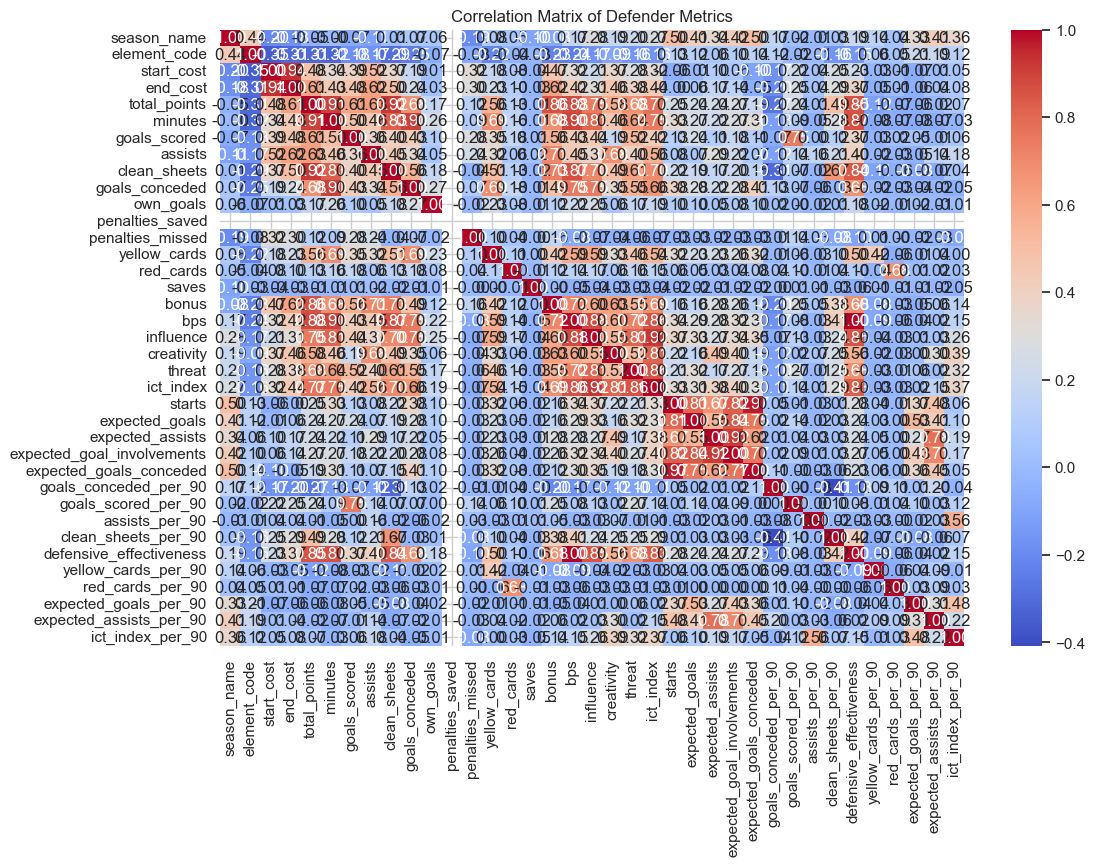

In [164]:
# Correlation matrix to analyze relationships between features
correlation_matrix = defenders_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Defender Metrics")
plt.show()

In [165]:
# Convert the correlation matrix to a DataFrame and reset the index
correlation_df = correlation_matrix.stack().reset_index()

# Rename columns for clarity
correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlations by filtering out rows where Variable 1 equals Variable 2
correlation_df = correlation_df[correlation_df['Variable 1'] != correlation_df['Variable 2']]

# Add a column for absolute correlation values for sorting
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()

# Sort the DataFrame by absolute correlation values in descending order to find the strongest correlations
strongest_correlations = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Display the top 10 strongest correlations
print("Top 10 Strongest Correlations:")
print(strongest_correlations.head(10))

# Sort the DataFrame by correlation values to find the weakest correlations (closest to 0)
weakest_correlations = correlation_df.sort_values(by='Abs_Correlation', ascending=True)

# Display the top 10 weakest correlations
print("Top 10 Weakest Correlations:")
print(weakest_correlations.head(10))

Top 10 Strongest Correlations:
                   Variable 1               Variable 2  Correlation  \
1096  defensive_effectiveness                      bps     0.999972   
606                       bps  defensive_effectiveness     0.999972   
781                    starts  expected_goals_conceded     0.967991   
921   expected_goals_conceded                   starts     0.967991   
75                 start_cost                 end_cost     0.938037   
110                  end_cost               start_cost     0.938037   
632                 influence                ict_index     0.923042   
737                 ict_index                influence     0.923042   
292              clean_sheets             total_points     0.919931   
152              total_points             clean_sheets     0.919931   

      Abs_Correlation  
1096         0.999972  
606          0.999972  
781          0.967991  
921          0.967991  
75           0.938037  
110          0.938037  
632          0.9230

Insights
* Defensive Impact: Metrics like clean_sheets_per_90, goals_conceded_per_90, and defensive_effectiveness are likely good indicators of a defender's overall performance. These metrics can be used to create predictive models or analysis to identify top-performing defenders.
* Predicting Performance: High correlations between expected metrics (like expected_goals_conceded) and actual outcomes (goals_conceded) indicate that expected metrics can be useful predictors.